<a href="https://colab.research.google.com/github/Prerana0205/MachineLearning_Models_Implementation/blob/main/Sample_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing Machine Learning models on database

### Importing the data

In [39]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Understanding the data

In [40]:
data = pd.read_csv (r'/Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [41]:
customer_5 = data.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [42]:
c =data.loc[:,['Dependents']]
c.head()

,Dependents
0,No
1,No
2,No
3,No
4,No


In [43]:
c =data.loc[:,['Dependents','tenure']]
c.head()

,Dependents,tenure
0,No,1
1,No,34
2,No,2
3,No,45
4,No,2


In [44]:
senior_male_electronic = data [(data['gender']=='Male') & (data['SeniorCitizen']==1) & (data['PaymentMethod']=='Electronic check')]
senior_male_electronic.head()
senior_male_electronic.shape

(298, 21)

In [45]:
customer_total_tenure = data [(data['tenure'] >70) | (data['MonthlyCharges'] >100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [46]:
two_mail_yes=data[(data['Contract']=='Two year') & (data['PaymentMethod']=='Mailed check') & (data['Churn']=='Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


### Data Manipulation

In [47]:
customer_333 = data.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,No,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1199.4,No
1861,7054-LGEQW,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.95,45.95,Yes
1417,5651-WYIPH,Female,1,No,No,18,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),49.85,865.75,No
725,6549-YMFAW,Male,1,Yes,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,21.25,204.55,No
177,2070-FNEXE,Female,1,No,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),76.45,503.6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,6986-IJDHX,Male,0,Yes,Yes,39,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.30,3266,Yes
856,8374-UULRV,Male,0,No,No,72,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,Yes,Two year,No,Credit card (automatic),86.05,6309.65,No
2548,9796-BPKIW,Male,1,No,No,8,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.95,562.7,No
1670,5047-LHVLY,Male,1,No,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,50.15,50.15,Yes


In [48]:
len(customer_333)

333

In [49]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### Data Visualization

In [50]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [51]:
%matplotlib inline

Text(0.5, 1.0, 'Distribution of InternetService')

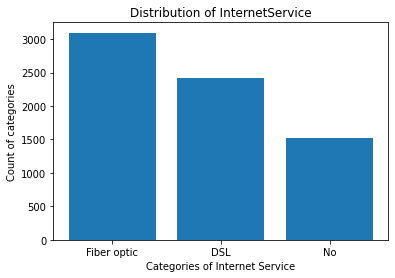

In [52]:
plt.bar(x=data['InternetService'].value_counts().keys().tolist(),height=data['InternetService'].value_counts().tolist())
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of InternetService')

Text(0.5, 1.0, 'Distribution of InternetService')

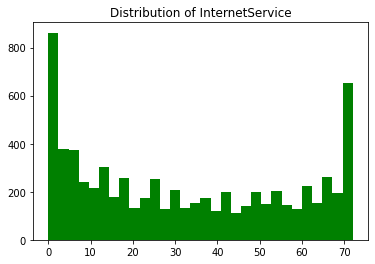

In [53]:
plt.hist(data['tenure'], color='green', bins=30)
plt.title('Distribution of InternetService')

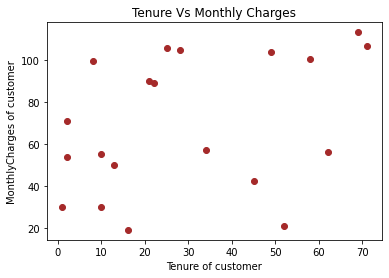

In [54]:
plt.scatter(x=data['tenure'].head(20),y=data['MonthlyCharges'].head(20), color='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('MonthlyCharges of customer')
plt.title('Tenure Vs Monthly Charges')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


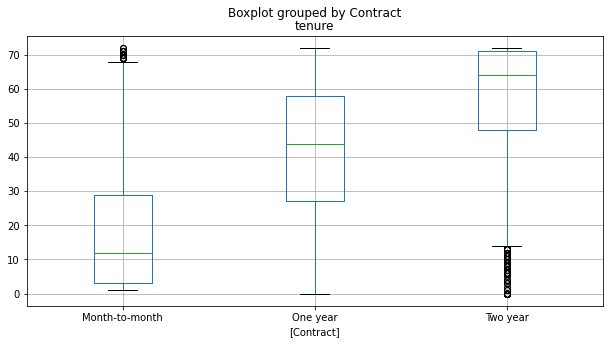

In [55]:
### Conclusion: What all did you understand from the above charts
data.boxplot(column='tenure' , by=['Contract'], figsize=(10,5))

### Implement Machine Learning Models

In [56]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

#Linear regression model

In [57]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [58]:
data= pd.read_csv (r'/Churn.csv')
x=data.loc[:,['tenure']].values
y=data.loc[:,['MonthlyCharges']].values

In [59]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
simpleLinearRegression = LinearRegression()
simpleLinearRegression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = simpleLinearRegression.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [62]:
y_test

array([[ 58.2 ],
       [116.6 ],
       [ 71.95],
       ...,
       [109.95],
       [ 24.55],
       [ 81.6 ]])

In [63]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
rmse

29.394584027273893

In [69]:
data= pd.read_csv (r'/Churn.csv')
x=data.loc[:,['MonthlyCharges','tenure']].values
y=data.loc[:,['Churn']].values

In [70]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.65, random_state=0)

#Logistic regression model

In [71]:
# Simple Logistic regression 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

[[3044  292]
 [ 714  528]]
0.7802533857579729


In [74]:
#Multiple Logistic regression
x=data.loc[:,['MonthlyCharges','tenure']].values
y=data.loc[:,['Churn']].values

In [75]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.80, random_state=0)

In [76]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

[[3724  388]
 [ 861  662]]
0.7783496007098492
